# Exploring Relationships With Obesity Levels
## <i>Analyzing Various Factors On Obesity<i>
> Created by Ebaadurrub Awan <br>
> Student ID: 100908038

#### Introduction

Obesity is known to be a global concern, which has significant public health implications contributing to the rise of chronic diseases such as diabetes, hypertension, and cardiovascular disorders. Obesity is defined as a complex medical condition where an individual has excessive body fat. This condition affects one's metabolism, which raises the risk of severe health conditions such as heart strokes, osteoarthritis, and certain cancers. Obesity is usually classified using a body mass index (BMI), the ratio of a person's weight in kilograms to the square of their height in meters. As a young individual constantly engaged in physical activities such as going to the gym or playing various sports like basketball, soccer, volleyball, pickleball, and softball, I always want to keep my body in great shape and ensure perfect health. Prevention is better than treatment, so I found a data set from __[Kaggle created by Fatemeh Mehrparvar](https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels)__ titled "Obesity Levels," to analyze various factors and answer the central question: What lifestyle factors significantly contribute to higher obesity levels? I aim to explore relationships between different attributes so that my readers and I can learn what contributes to obesity and gain knowledge to make appropriate health decisions to prevent health problems.

#### Analysis

The creator of the dataset states that the data includes an estimation of obesity levels from individuals from Colombia, Mexico, and Peru. According to the creator, 77% of the data was generated using the Weka tool and SMOTE filter, and 23% of the data was collected from individuals through a web platform.

Before showing the data, there are several abbreviations that readers may not understand. I will clean the data further on in the notebook. Below is the list of abbreviations in the dataset and their meanings:

- **family_history_with_overweight:** "Has a family member suffered or suffers from overweight?"
- **FAVC:** "Do you eat high-caloric food frequently?"
- **FCVC:** "Do you usually eat vegetables in your meals?"
- **NCP:** "How many main meals do you have daily?"
- **CAEC:** "Do you eat any food between meals?"
- **SMOKE:** "Do you smoke?"
- **CH2O:** "How much water do you drink daily?"
- **SCC:** "Do you monitor the calories you eat daily?"
- **FAF:** "How often do you have physical activity?"
- **TUE:** "How much time do you use technological devices such as cell phones, video games, television, computer, and others?"
- **CALC:** "How often do you drink alcohol?"
- **MTRANS:** "Which transportation do you usually use?"
- **NObeyesdad**: "Obesity level"

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Data Loading

In [20]:
# Load Data
obesity_df = pd.read_csv("ObesityDataSet.csv")

# Find Information about Data
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

> 

- The shape of the data set is 2111 rows by 17 columns.
- There is mix of categorical and numerical data.
- There are 2111 non-null data in each column indicating that the data has no missing values.

In [21]:
# Displaying a preview of the data
obesity_df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


- The DataFrame shown above is a preview of the data set only displaying the first ten rows.
- The abbreviations make it unclear to understand what each column represents.

In the next step, I will clean and manipulate the data for easier read.

##### Cleaning & Manipulation

As mentioned earlier, the abbreviations for most columns make it more challenging to understand what each column represents. I will rename most attribute names and also remove any useless columns. I will also round a few numbers in some columns and add the body mass index (BMI) to help understand obesity levels.

In [22]:
# Rename Columns
obesity_df.rename(columns = {'Height':'Height (m)'}, inplace = True)
obesity_df.rename(columns = {'Weight':'Weight (kg)'}, inplace = True)
obesity_df.rename(columns = {'CALC':'Alcohol Intake'}, inplace = True)
obesity_df.rename(columns = {'FAVC':'High-Colaric Food Intake'}, inplace = True)
obesity_df.rename(columns = {'FCVC':'Vegetable Intake'}, inplace = True)
obesity_df.rename(columns = {'NCP':'Main Meals'}, inplace = True)
obesity_df.rename(columns = {'SMOKE':'Smoking'}, inplace = True)
obesity_df.rename(columns = {'CH2O':'Water Intake'}, inplace = True)
obesity_df.rename(columns = {'family_history_with_overweight':'Family History'}, inplace = True)
obesity_df.rename(columns = {'FAF':'Physical Activity'}, inplace = True)
obesity_df.rename(columns = {'CAEC':'Food Between Meals'}, inplace = True)
obesity_df.rename(columns = {'NObeyesdad':'Obesity Level'}, inplace = True)

# Remove Columns
obesity_df = obesity_df.drop(columns = ['MTRANS', 'TUE', 'SCC'])

# Rounding down for Age and converting to integer
obesity_df['Age'] = obesity_df['Age'].astype(int)

# Rounding to 2 decimal places for height, weight and physical activity
obesity_df['Height (m)'] = obesity_df['Height (m)'].round(2)
obesity_df['Weight (kg)'] = obesity_df['Weight (kg)'].round(2)
obesity_df['Physical Activity'] = obesity_df['Physical Activity'].round(2)

# Rounding main meals to the nearest integer
obesity_df['Main Meals'] = obesity_df['Main Meals'].round()
# Convert to integer
obesity_df['Main Meals'] = obesity_df['Main Meals'].astype(int)

# Rounding water intake to the nearest integer
obesity_df['Water Intake'] = obesity_df['Water Intake'].round()
# Convert to integer
obesity_df['Water Intake'] = obesity_df['Water Intake'].astype(int)

# Rounding vegetable intake to the nearest integer
obesity_df['Vegetable Intake'] = obesity_df['Vegetable Intake'].round()
# Convert to integer
obesity_df['Vegetable Intake'] = obesity_df['Vegetable Intake'].astype(int)

# Remove underscores from Obesity Level
obesity_df['Obesity Level'] = obesity_df['Obesity Level'].str.replace(pat = '_', repl = ' ', regex = False)

# Add BMI column
obesity_df['BMI'] = (obesity_df['Weight (kg)'] / (obesity_df['Height (m)'] * obesity_df['Height (m)'])).round(2)

obesity_df

,Age,Gender,Height (m),Weight (kg),Alcohol Intake,High-Colaric Food Intake,Vegetable Intake,Main Meals,Smoking,Water Intake,Family History,Physical Activity,Food Between Meals,Obesity Level,BMI
0,21,Female,1.62,64.00,no,no,2,3,no,2,yes,0.00,Sometimes,Normal Weight,24.39
1,21,Female,1.52,56.00,Sometimes,no,3,3,yes,3,yes,3.00,Sometimes,Normal Weight,24.24
2,23,Male,1.80,77.00,Frequently,no,2,3,no,2,yes,2.00,Sometimes,Normal Weight,23.77
3,27,Male,1.80,87.00,Frequently,no,3,3,no,2,no,2.00,Sometimes,Overweight Level I,26.85
4,22,Male,1.78,89.80,Sometimes,no,2,1,no,2,no,0.00,Sometimes,Overweight Level II,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.71,131.41,Sometimes,yes,3,3,no,2,yes,1.68,Sometimes,Obesity Type III,44.94
2107,21,Female,1.75,133.74,Sometimes,yes,3,3,no,2,yes,1.34,Sometimes,Obesity Type III,43.67
2108,22,Female,1.75,133.69,Sometimes,yes,3,3,no,2,yes,1.41,Sometimes,Obesity Type III,43.65
2109,24,Female,1.74,133.35,Sometimes,yes,3,3,no,3,yes,1.14,Sometimes,Obesity Type III,44.04


After cleaning and manipulating the data set, it looks cleaner and more straightforward than how it was displayed previously. I changed the attribute names from abbreviations to a simple title for a more straightforward read. I turned data such as age, vegetable intake, main meals, and water intake from float data types into integers. This is because values like age or asking someone how many meals they have eaten are expressed in whole numbers without decimals. I also rounded height, weight, and physical activity to 2 decimal places. I also added the body mass index (BMI) to help understand obesity levels. Knowing the BMI allows us to see what obesity level is declared obese. After this step, the shape of the data set is now 2111 rows by 15 columns.

##### Data Visualization

Various factors will be analyzed throughout this step to help answer the main question. First, I will explore the distribution between age, gender, and obesity levels.

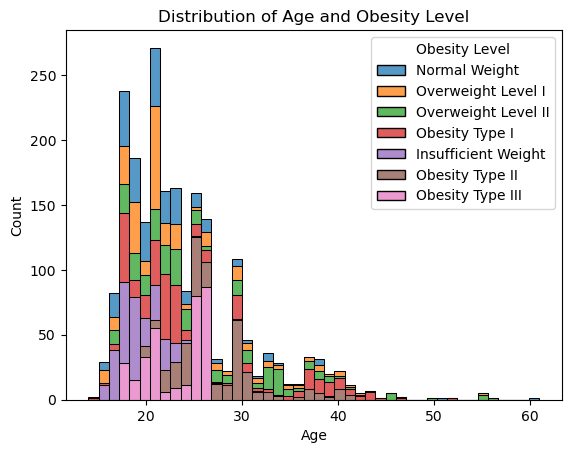

In [23]:
# Distribution of Age and Obesity Types using a Histogram

sns.histplot(data = obesity_df, x = obesity_df.Age, hue = 'Obesity Level', multiple = 'stack')
plt.title("Distribution of Age and Obesity Level")
plt.show()

Analyzing the visual above, it seems to be common from almost each age range until the mid-40s; individuals suffer from either obesity type I, II, or III. A lot more people suffer from obesity type III in their mid-20s. This visual shows a trend that young adults experience with obesity type III, and as the graph continues, type III obesity dies down, but it is common to see type I and II obesity levels as the ages increase until the mid-40s. This graph shows that younger adults are targeted when it comes to obesity levels.

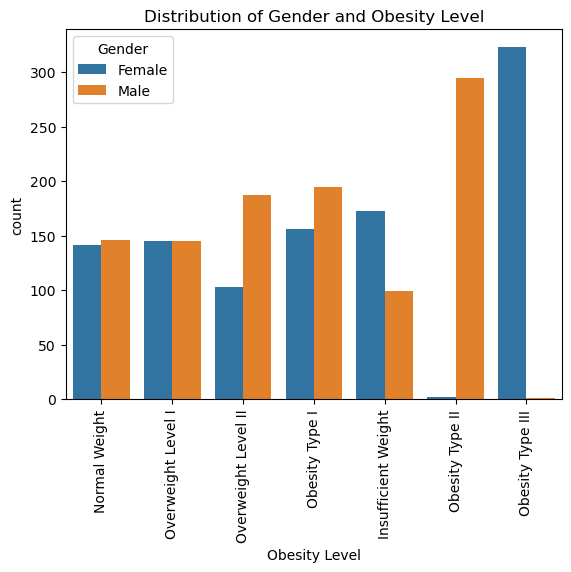

In [24]:
# Distribution of Gender and Obesity Types using a Bar Chart

sns.countplot(data = obesity_df, x = obesity_df['Obesity Level'], hue = obesity_df.Gender)
plt.title("Distribution of Gender and Obesity Level")
plt.xticks(rotation = 90)
plt.show()


Analyzing the visual above, there are more males with obesity type I and II but a large amount of females with obesity type III. More than 300 females suffer from obesity type III. The amount of people with an average weight is less than 300 when adding the female and male bars. Overall, there seem to be many numbers with obesity levels I, II, and III compared to the numbers of average weight.

In [25]:
# Calculating the percentage of women with type III obesity

female = obesity_df[(obesity_df['Gender'] == 'Female') & (obesity_df['Obesity Level'] == 'Obesity Type III')]
female_percent = len(female)/len(obesity_df)
print(f"{female_percent:.0%} of the females had obesity type III.")


15% of the females had obesity type III.


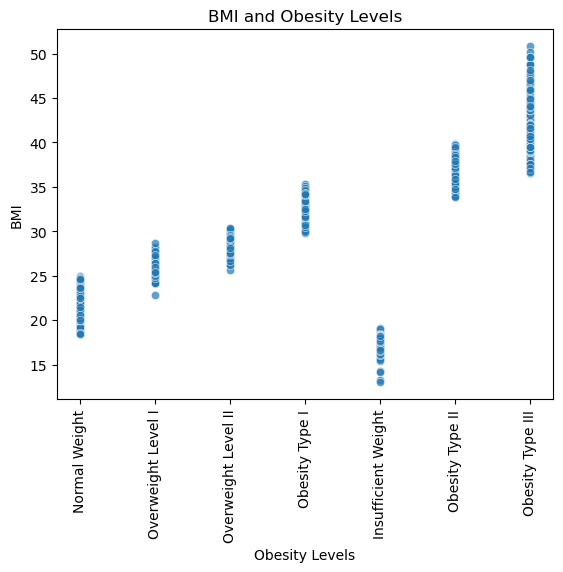

In [26]:
# Comparing BMI and Obesity Types using a Scatter Plot

sns.scatterplot(data = obesity_df, x = obesity_df['Obesity Level'], y = obesity_df['BMI'], alpha = 0.7)
plt.xlabel('Obesity Levels')
plt.xticks(rotation = 90)
plt.ylabel('BMI')
plt.title('BMI and Obesity Levels')
plt.show()


According to the scatter plot above, a BMI starting from the high 20s declares an individual with type I obesity. Many individuals suffer from type III obesity. I will calculate the statistics for each obesity type for an in-depth analysis.

In [27]:
# Statistics for Obesity Type I
ob_type_one = obesity_df[obesity_df['Obesity Level'] == 'Obesity Type I']
print(f"Min BMI for Obesity Type I: {ob_type_one['BMI'].min()}")
print(f"Max BMI for Obesity Type I: {ob_type_one['BMI'].max()}")
print(f"Mean BMI for Obesity Type I: {round(ob_type_one['BMI'].mean(), 2)}")
print()

# Statistics for Obesity Type II
ob_type_two = obesity_df[obesity_df['Obesity Level'] == 'Obesity Type II']
print(f"Min BMI for Obesity Type II: {ob_type_two['BMI'].min()}")
print(f"Max BMI for Obesity Type II: {ob_type_two['BMI'].max()}")
print(f"Mean BMI for Obesity Type II: {round(ob_type_two['BMI'].mean(), 2)}")
print()

# Statistics for Obesity Type III
ob_type_three = obesity_df[obesity_df['Obesity Level'] == 'Obesity Type III']
print(f"Min BMI for Obesity Type III: {ob_type_three['BMI'].min()}")
print(f"Max BMI for Obesity Type III: {ob_type_three['BMI'].max()}")
print(f"Mean BMI for Obesity Type III: {round(ob_type_three['BMI'].mean(), 2)}")

Min BMI for Obesity Type I: 29.81
Max BMI for Obesity Type I: 35.27
Mean BMI for Obesity Type I: 32.27

Min BMI for Obesity Type II: 33.89
Max BMI for Obesity Type II: 39.81
Mean BMI for Obesity Type II: 36.72

Min BMI for Obesity Type III: 36.61
Max BMI for Obesity Type III: 50.82
Mean BMI for Obesity Type III: 42.29


The following steps will analyze the relationship between attributes to help answer the main question.

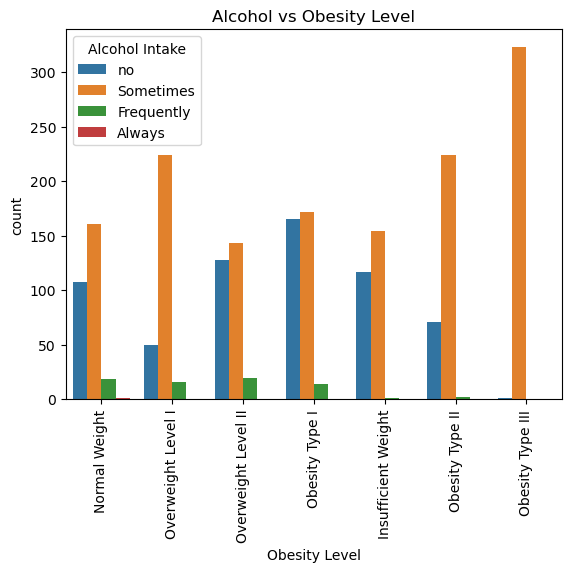

In [28]:
# Analyze Alcohol Intake and Obesity Levels

sns.countplot(data = obesity_df, x = 'Obesity Level', hue = obesity_df['Alcohol Intake'])
plt.title("Alcohol vs Obesity Level")
plt.xticks(rotation = 90)
plt.show()

It is common for each obesity level to be drinking "sometimes" for their alcohol intake. Although it seems like there is a large count of people with obesity type III who are drinking alcohol "sometimes." Since drinking "sometimes" has a higher count for a higher obesity type, alcohol can be a contributor to higher obesity levels, but we need to look at other factors.

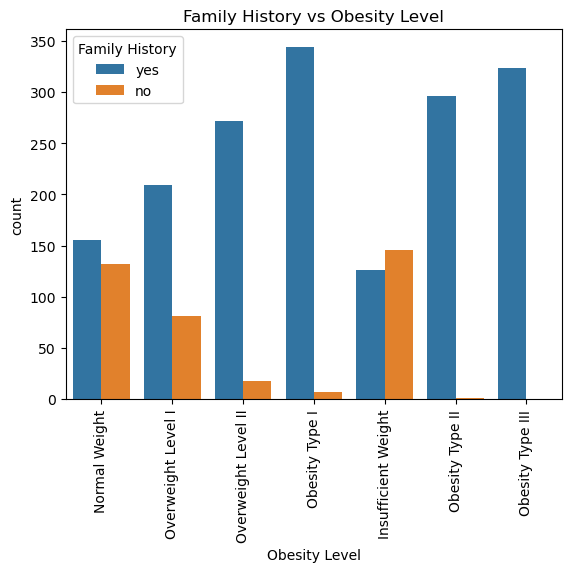

In [29]:
# Analyze Family History and Obesity Levels

sns.countplot(data = obesity_df, x = 'Obesity Level', hue = obesity_df['Family History'])
plt.title("Family History vs Obesity Level")
plt.xticks(rotation = 90)
plt.show()

It is evident that anyone with any obesity type most likely got it due to their genetics. The bar graph shows a high count of obese people and family history, which is a contributor to obesity.

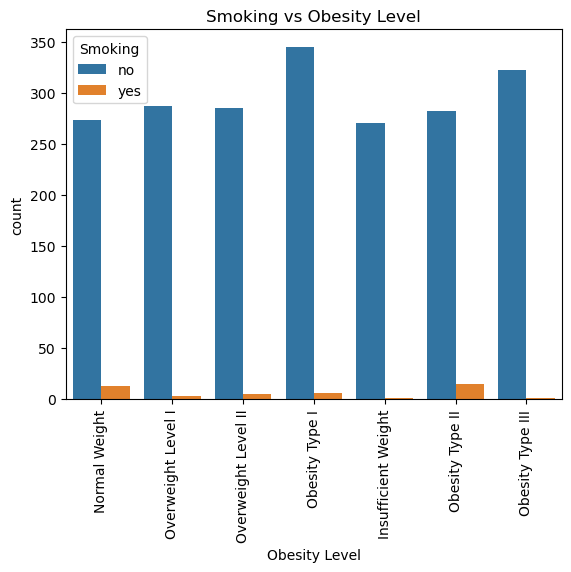

In [30]:
# Analyze Smoking and Obesity Levels

sns.countplot(data = obesity_df, x = 'Obesity Level', hue = obesity_df['Smoking'])
plt.title("Smoking vs Obesity Level")
plt.xticks(rotation = 90)
plt.show()

There is no relationship with smoking and obesity.

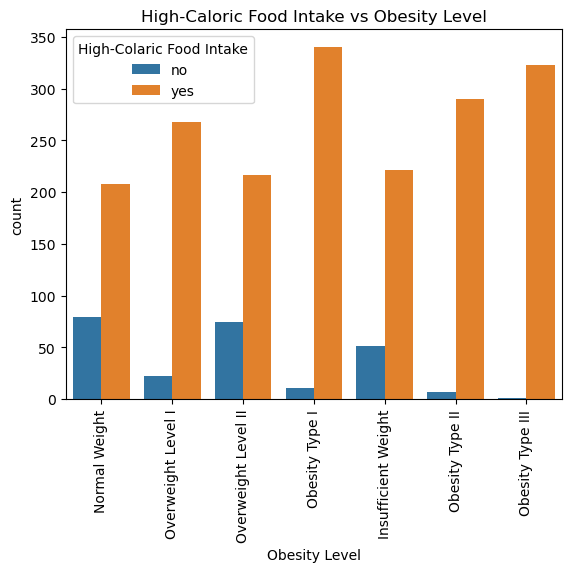

In [31]:
# Analyze High Caloric Food Intake and Obesity Levels

sns.countplot(data = obesity_df, x = 'Obesity Level', hue = obesity_df['High-Colaric Food Intake'])
plt.title("High-Caloric Food Intake vs Obesity Level")
plt.xticks(rotation = 90)
plt.show()

Another factor that contributes to obesity which is evident from the bar graph. Each obese level had a high count of high caloric food intake.

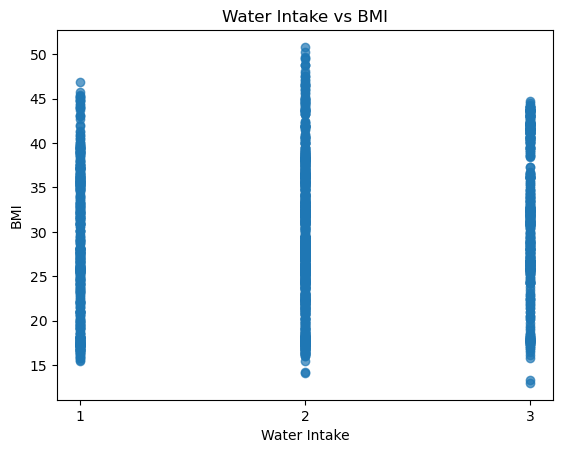

In [32]:
# Analyzing Water Intake and BMI

plt.scatter(x = obesity_df['Water Intake'], y = obesity_df['BMI'], alpha = 0.7)
plt.xticks(range(1, 4))
plt.title('Water Intake vs BMI')
plt.xlabel('Water Intake')
plt.ylabel('BMI')
plt.show()

There is no relationship with water intake. An individual can have a low BMI and have a water intake of 3 but not be obese yet, and an individual can have a water intake of 1 yet have a high BMI.

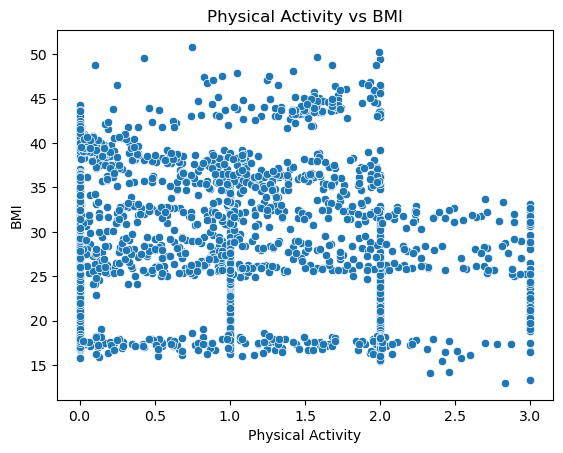

In [33]:
# Analyzing Physical Activity and BMI

sns.scatterplot(x = obesity_df['Physical Activity'], y = obesity_df['BMI'])
plt.title('Physical Activity vs BMI')
plt.xlabel('Physical Activity')
plt.ylabel('BMI')
plt.show()

Physical activity does make some difference. Having a physical activity score between 2 and 3 results in a lower BMI compared to a score of 0 to 2 and a high BMI.

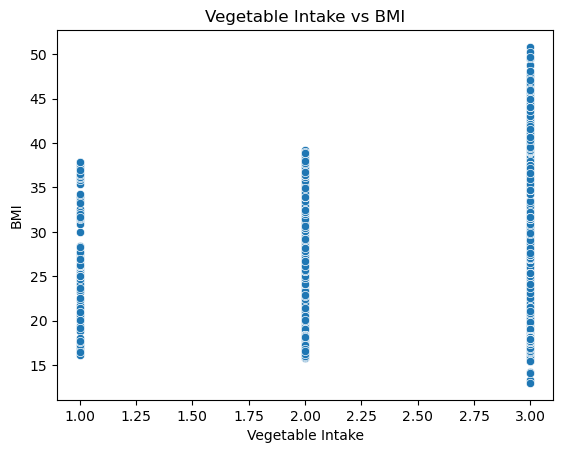

In [34]:
# Analyzing Vegetable Intake and BMI

sns.scatterplot(x = obesity_df['Vegetable Intake'], y = obesity_df['BMI'])
plt.title('Vegetable Intake vs BMI')
plt.xlabel('Vegetable Intake')
plt.ylabel('BMI')
plt.show()

This is an interesting piece of data since having a higher vegetable intake results in higher BMI levels.

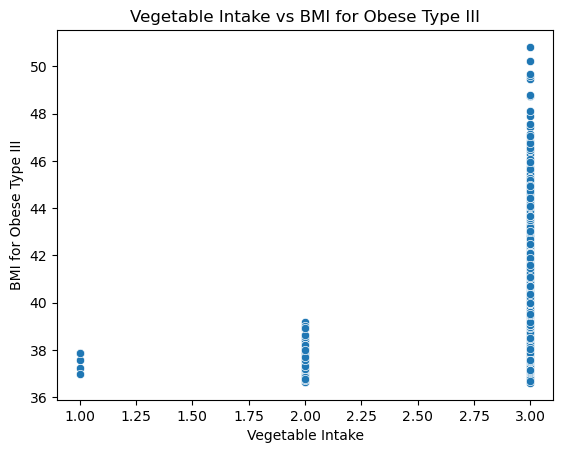

In [35]:
# Showing vegetable intake with BMI for obese type III

filtered_df = obesity_df[obesity_df['BMI'] >= 36.61]

# Create the scatter plot
sns.scatterplot(x=filtered_df['Vegetable Intake'], y=filtered_df['BMI'])
plt.title('Vegetable Intake vs BMI for Obese Type III')
plt.xlabel('Vegetable Intake')
plt.ylabel('BMI for Obese Type III')
plt.show()


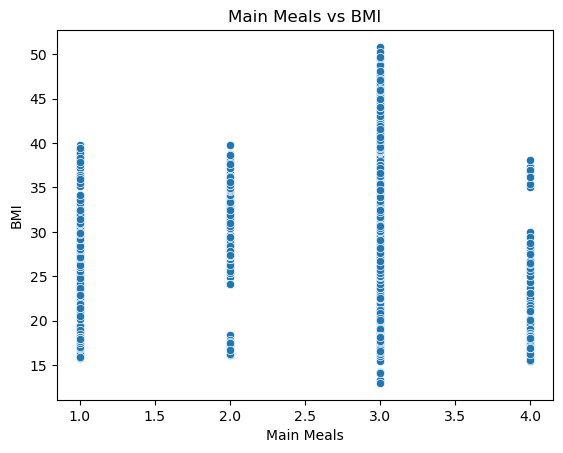

In [36]:
# Analyzing Main Meals and BMI

sns.scatterplot(x = obesity_df['Main Meals'], y = obesity_df['BMI'])
plt.title('Main Meals vs BMI')
plt.xlabel('Main Meals')
plt.ylabel('BMI')
plt.show()

Having three or four meals will result in a higher obesity type. Main meals can also be a candidate to be a significant contributor.

##### Discussion

After analyzing the data set and the relationship between different attributes, I found some interesting results that I was not expecting. After all, the analysis will answer the main question: "What lifestyle factors contribute to a significant obesity level."

Starting with distributions between age and obesity level and gender and obesity level, obesity type III was typical for young adults ranging from the ages from high 10s to mid-20s. Obese types I and II were frequently seen after the mid-20s, but the count was low. Older age, starting from the mid-40s, did not have a high count for any obesity level. When it came to gender and obesity level, more females experienced obesity type III than males, while more males experienced obesity type I and II.

To be considered obese type I, an individual had to be between 29.81 and 35.27. For obese type II, an individual had to be between 33.89 and 9.81. For obese type III, an individual had to be between 36.61 and 50.82.

When exploring relationships, alcohol had a slight influence on obesity levels. There was a high count of individuals drinking alcohol "sometimes" and had obesity type III. This count number was past 300. When it came to analyzing family history and obesity level, individuals who were dealing with a sort of overweight or obesity type had a family history linked to obesity. This factor is a contender as a significant contributor. There was no relationship between smoking and obesity levels since most of the data had records of people not smoking. High caloric food intake was also a contender as a significant contributor. There was a trend that individuals with obese levels had more high caloric intake than any other levels, with the count exceeding 250. Water intake also did not make a difference. Physical activity was also one factor that had a slight influence. Individuals with a physical activity score between 2 and 3 had lower BMI levels. This still meant there were individuals with type I and II obesity levels but remained on the lower side of the BMI spectrum. Physical activity scores between 0 and 2 had higher BMI levels, which means obesity type III. One factor that surprised me was vegetable intake. For some reason, a vegetable intake of 3 had a lot of type III obese individuals. This was shocking because vegetables are healthy, yet there were still individuals with type III obesity. This factor was also a contender. Finally, main meals also had a slight influence since the more meals an individual ate, the higher the BMI level.

After a lengthy analysis, I concluded that the main contributors to higher obesity levels were a family history of obesity, high-calorie food, and vegetable intake. Secondary contributors, such as physical activity, main meals, and alcohol, did have an influence, but these relationships did not strongly correlate with the primary contributors. Even though I'm surprised that vegetable intake is a primary contributor, unhealthy habits like high caloric intake might offset the benefits of vegetable consumption.



##### Reference

- __[Kaggle (Data Set)](https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels)__
- __[Obesity Information 1](https://www.mayoclinic.org/diseases-conditions/obesity/symptoms-causes/syc-20375742)__
- __[Obesity Information 2](https://www.who.int/news-room/questions-and-answers/item/obesity-health-consequences-of-being-overweight#:~:text=Being%20overweight%20or%20obese%20can,endometrial%2C%20breast%20and%20colon)__
- Pandas (Data Manipulation)
- Seaborn (Data Visualization)
- Matplotlib (Data Visualization)


##### LLM

- Grammarly (Fix Writing Issues)